# Project 1 Section 2: Feature extraction

In Section 1, we learnt how to train a CNN model to classify images from scratch. In this section, we are going to learn how to build a model by applying the feature extraction technique.
You are also going to learn how to identify whether your model is overfitting or underfitting.

## Tutorial 1

By the end of tutorial 1, you will:
* have gained a good understanding of what overfitting and underfitting means
* be able to detect whether your model is overfitting or underfitting

### Overfitting

**What is overfitting?**

Overfitting occurs when the model learns also the noise in the training data, and therefore it performs on the training data very well on the one hand, but on the other hand it is not able to generalise well on the new, unseen data.

**How to detect overfitting?**

You can detect overfitting when the training loss is low while the validation loss is high and when the training accuracy is higher than the validation accuracy.
In a plot, you can detect an overfit model when the training loss decreases whereas the validation loss decreases, but then it begins increasing.


### Underfitting

**What is underfitting?**

Underfitting occurs when the model is not able to learn the underlying patterns and relationships in the training data, and consequently, it performs poorly on both the training and the validation data.

**How to detect underfitting?**

You can detect underfitting when both the training and validation loss is high and when both the training and validation accuracy is low.
In a plot, you can detect an underfit model when the training and validation loss remain high or when there is a considerable gap between them.


### Balance between bias and variance

The ability of a model to generalize depends on its **bias** and **variance**.

Bias is the difference between the actual and predicted values, thus high bias means that the model makes assumptions that are not true.

High variance means that the model is sensitive to the noise in the training data and when it is trained on a different subset of the training data, it can lead to significant variations in the predictions.

* If the model is overfitting, this means that it has a high variance and if it is underfitting it means it has a low variance.
* If the model is overfitting, this means it has a low bias and if it is underfitting it has a high bias.
* It is important to strike the balance between bias and variance so the model’s training and validation error remain both low.


### Well-fitted models

A well-fitted model has both low variance and low bias, which means that it is complex enough to learn important patterns in the training data, but not too complex to also fit the noise.

**How to identify that a model fits well?**

* You can identify a well-fitted model, when both the training and validation loss remain low with the validation loss being slightly larger than the training loss.
* In a plot, you can identify a well-fitted model when both the training and validation loss decrease until they converge or until they decrease to a stable point so there is a small difference between the two final loss values.


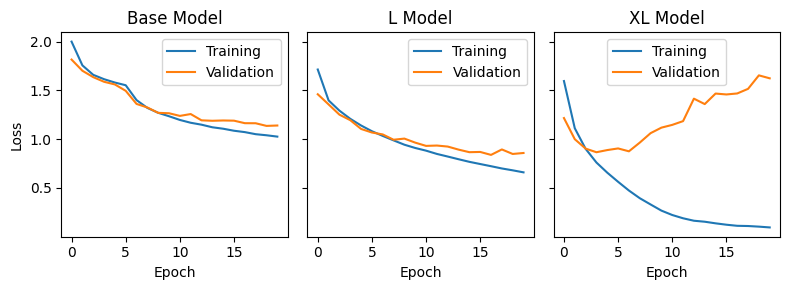

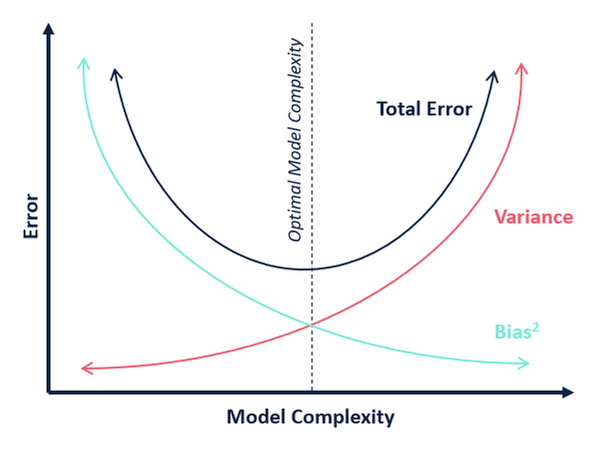

https://www.v7labs.com/blog/overfitting-vs-underfitting



### How to tackle overfitting and underfitting

Common techniques to tackle overfitting and underfitting is to:

* either increase or decrease the number of layers in your neural network
increase the training time
* fine-tune hyperparameters, such as early stopping which stops training before the model starts learning the noise in the training data


## Tutorial 2

By the end of tutorial 2, you will:

* have gained a good understanding of what feature extraction is
* build, train and evaluate a model with feature extraction for recognizing cats and dogs in images
* customize a model to further increase its performance

### Transfer learning

Transfer learning is a useful technique which allows us to reuse the knowledge we gained from solving a task in a new task. There are two transfer learning techniques, that is, feature extraction and fine-tuning. In this Section, we are going to apply the feature extraction technique while in Section 3 the fine-tuning technique.

By applying transfer learning techniques, you save training time and computational resources.

### Feature extraction

You are going to build a baseline model from the MobileNetV2 model which was pretrained on the ImageNet dataset. The ImageNet dataset consists of 1.4 million images and 1000 classes. As a result, this model has been trained to extract features from images, therefore it acts as a **feature extractor**. This acquired knowledge is going to be tailored to our specific, binary classification task, that of classifying cats and dogs.

For more information on MobileNetV2, please click [here](https://arxiv.org/abs/1801.04381?ref=blog.roboflow.com)

### Downloading the cats and dogs dataset

You are going to use a dataset from the Tensorflow datasets which contains images of cats and dogs.

In [1]:
import tensorflow as tf
import os

# Download the cats & dogs file from a URL with tf.keras.utils.get_file() method
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

# get the directory of the file with the os.path.dirname() method, which is /root/keras/datasets
zip_file = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

#combine the paths of the file into one PATH by using the os.path.join() method
PATH = os.path.join(os.path.dirname(zip_file), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

2025-09-16 22:24:05.255833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-16 22:24:05.255872: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-16 22:24:05.256979: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-16 22:24:05.263836: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-16 22:24:05.932916: W tensorflow/compiler/tf2

The `os` module allows you to work with the file which contains the cats & dogs dataset as well as its directory.

Download the cats & dogs file from a URL with the `tf.keras.utils.get_file()` method. Afterwards, get the directory of the file with the `os.path.dirname()` method, which is `/root/keras/datasets`. Finally, combine the paths of the file into one PATH by using `the os.path.join()` method.

We now define one directory for the train dataset (`train_dir`) and one directory for the validation dataset (`validation_dir`).


In [2]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

We are going to use the `image_dataset_from_directory()` method in order to generate our train validation datasets. We would first have to define the `BATCH_SIZE` as well as the `IMAGE_SIZE`. We resize the images to (224, 224) pixels, and set the batch size to 32. We also set the `RANDOM_SEED` to a fixed number, to make the experiments repeatable.


In [3]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
RANDOM_SEED = 123

In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                             seed = RANDOM_SEED,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 2000 files belonging to 2 classes.


2025-09-16 22:24:08.091052: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 18229 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe MIG 2g.20gb, pci bus id: 0001:00:00.0, compute capability: 8.0
2025-09-16 22:24:08.253119: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [5]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                             seed = RANDOM_SEED,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMAGE_SIZE)

Found 1000 files belonging to 2 classes.


Check how many classes there are with the following command.

In [6]:
class_names = train_dataset.class_names
print(class_names)

['cats', 'dogs']


Each image in the Cats and Dogs dataset has pixels with discrete values between 0 and 255. We scale those values to the range between -1 and 1, since MobileNet has also been trained on images with values ranging from -1 to 1. We define a custom scaling lazer and apply this on the training and validation set.

Choose randomly three images with the `.take()` method and plot them.

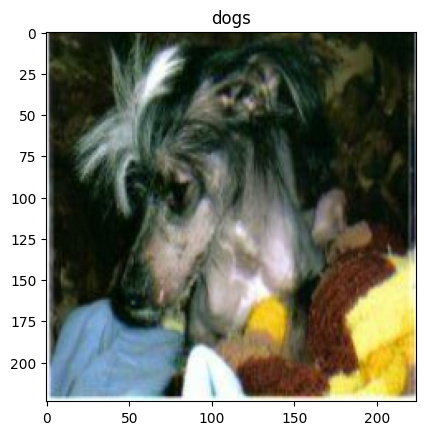

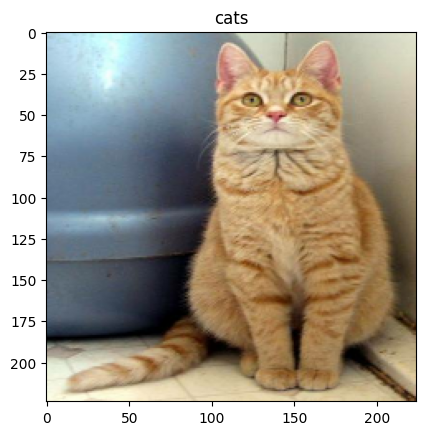

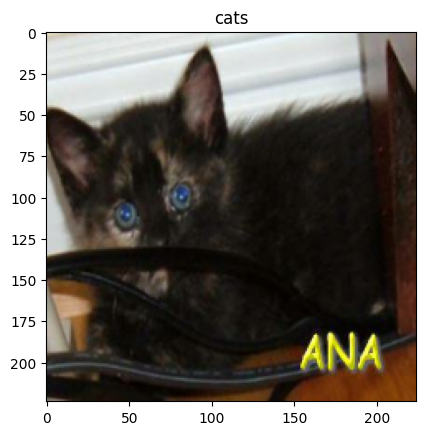

In [7]:
import matplotlib.pyplot as plt


for image, label in train_dataset.take(3):
    image = image.numpy().astype("uint8")
    plt.imshow(image[0])
    plt.title(class_names[label[0]])

    plt.show()


Load the MobileNetV2 (with pre-trained imagenet weights) base model with the following command.

We then utilize the pre-trained MobileNetV2 for the new task using transfer learning, specifically the feature extraction technique. For this, we apply the following steps:



1.   Load the pre-trained model remove its fully-connected head
2.   Freeze the convolutional base of the pre-trained model
3.   Add a customized fully-connected head onto the pre-trained convolutional base
4.   Train or fine-tune the customized fully-connected head with the dataset for the new task




Recall the notation from the lectures:

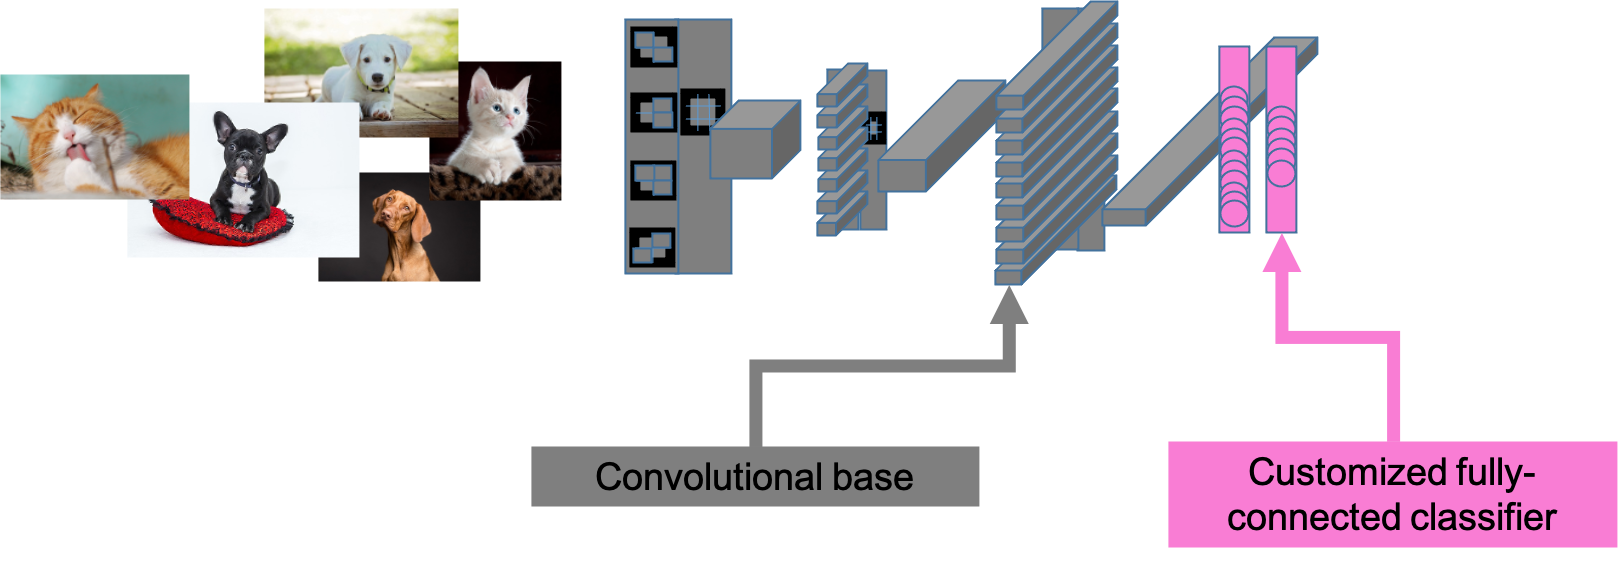

We load the **convolutional base** of MobileNetV2 with the following command. We say `include_top=False` to avoid loading also the fully-connected classifier at the end of MobileNetV2. We do this because we want to change that classifier with our own **customized fully-connected classifier**.

In [8]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

We now freeze the convolutional base. That is, we indicate that we do not want to train the convolutional base.

In [9]:
base_model.trainable = False

No we can **assemble our model** from the convolutional base of the MovileNetV2, the customized fully-connected classifier, a GlobalAverage layer, and a preprocessing layer to scale the data.

We use a Functional architecture, which means that it would be more complex than the Sequential model you were introduced to in Section 1. More specifically, a Functional model allows for multiple inputs and outputs as well as shared layers. See more details [here](https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10).

First, we import the necessary modules for our model.

In [10]:
from keras.layers import Dense, GlobalAveragePooling2D, Rescaling
from keras.models import Model

We then define the shape of the input image to the model.

In [11]:
inputs = tf.keras.Input(shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

The first layer is a `Rescaling` layer. In order to make the dataset fit with convolutional base, we need to **rescale the pixel values**. Originally, each image in the Cats and Dogs dataset has pixels with discrete values between 0 and 255. We scale those values to the range between -1 and 1, since MobileNet has also been trained on images with values ranging from -1 to 1.

Hence, the rescaling layer divides each pixel's value by 127.5 and subtracts 1.

In [12]:
x = Rescaling(scale = 1./127.5, offset = -1)(inputs)

We now **take the convolutional base of MobileNetV2**, called `base_model`, and set the parameter `training = False`, to make sure that the model runs in inference mode.

In [13]:
x = base_model(x, training = False)

We then specify our **customized fully-connected classifier**. It consists two layers:

1. A **global average pooling**, which searches for the average value of each feature map. It converts the feature maps to a 1280 vector per image.


In [14]:
x = tf.keras.layers.GlobalAveragePooling2D()(x)

2. An **output layer with a single neuron**, which means that it contains a value 0 or 1 for the class cat or dog. The activation function is sigmoid because our task is a binary classification task.

In [15]:
outputs = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

Finally, we **assemble the whole model** as Functional architecture by indicating the input and output objects.

In [16]:
model_feature_extraction = tf.keras.Model(inputs, outputs, name="Feature_Extraction_1")

#### Displaying the model (optional)

*This part is technical and can be omitted*

If you display the model with the `.summary()` method, you will see the number of total, learnable parameters (`Total params`) at the bottom of the summary. From those, some are trainable (`Trainable params`) and some are not (`Non-trainable params`).

(`Trainable params`) are the weights that will be updated during training while (`Non-trainable params`) are the weights from the MobileNetV2 which will remain intact, so the knowledge of the features that the model learned when it was trained on the ImageNet dataset can be transferred to the binary classification of cats and dogs. The feature extraction technique seems to be useful if the source (learned features) domain is similar to the target (cats & dogs dataset) domain.

You can also see that the MobileNetV2 base model is not trainable.



In [17]:
model_feature_extraction.summary(show_trainable=True)

Model: "Feature_Extraction_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling (Rescaling)       (None, 224, 224, 3)       0         Y          
                                                                            
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   N          
 tional)                                                                    
                                                                            
 global_average_pooling2d (  (None, 1280)              0         Y          
 GlobalAveragePooling2D)                                                    
                                                                            
 dense (Dense)               (None, 1)        

### Training

We now compile and train this CNN.

In [18]:
learning_rate = 0.0001
model_feature_extraction.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits= False),
              metrics=['accuracy'])
history = model_feature_extraction.fit(train_dataset,
                    epochs = 10,
                    validation_data=validation_dataset)

Epoch 1/10


2025-09-16 22:24:13.209774: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-09-16 22:24:13.279012: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


 1/63 [..............................] - ETA: 2:43 - loss: 0.6900 - accuracy: 0.5938

2025-09-16 22:24:13.901166: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f50c44c6430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-09-16 22:24:13.901195: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA A100 80GB PCIe MIG 2g.20gb, Compute Capability 8.0
2025-09-16 22:24:13.906279: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758061454.001514    3511 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 [==============================] - 6s 50ms/step - loss: 0.5379 - accuracy: 0.7475 - val_loss: 0.4404 - val_accuracy: 0.8640
Epoch 2/10
63/63 [==============================] - 3s 40ms/step - loss: 0.3519 - accuracy: 0.9135 - val_loss: 0.3037 - val_accuracy: 0.9400
Epoch 3/10
63/63 [==============================] - 2s 39ms/step - loss: 0.2542 - accuracy: 0.9490 - val_loss: 0.2274 - val_accuracy: 0.9720
Epoch 4/10
63/63 [==============================] - 2s 39ms/step - loss: 0.1974 - accuracy: 0.9630 - val_loss: 0.1811 - val_accuracy: 0.9790
Epoch 5/10
63/63 [==============================] - 2s 39ms/step - loss: 0.1617 - accuracy: 0.9695 - val_loss: 0.1508 - val_accuracy: 0.9820
Epoch 6/10
63/63 [==============================] - 2s 39ms/step - loss: 0.1377 - accuracy: 0.9730 - val_loss: 0.1298 - val_accuracy: 0.9830
Epoch 7/10
63/63 [==============================] - 2s 39ms/step - loss: 0.1205 - accuracy: 0.9755 - val_loss: 0.1147 - val_accuracy: 0.9850
Epoch 8/10
63/63 [======

We plot the validation loss and training loss and accuaracy through the training.

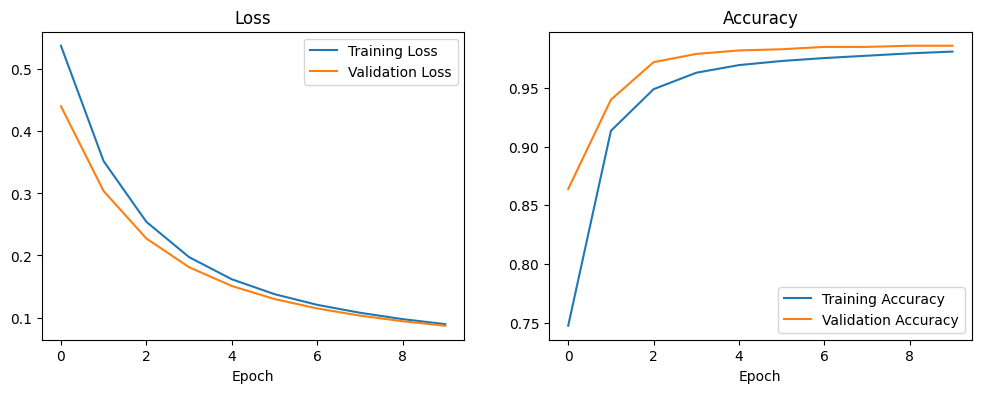

In [19]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend()

#### Training another customized fully-connected classifier

You could also customize the fully-connected classifier in order to increase the performance of the model. Below we can see that two layers have been added to the classifier:

1. Dropout layer with a dropout rate of 0.2
2. Additional Dense layer with 128 neurors and the `relu` activation function

This time, we add a dense layer with 128 neurons and a Dropout layer. A Dropout layer helps with overfitting by deactivating a fraction of neurons in the previous layer at each round of training. The value 0.2 defines the fraction of neurons that may be dropped out. Read more about Dropout [here](https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9).

In [20]:
from keras.layers import Dropout

inputs = tf.keras.Input(shape = (224, 224, 3))
x = Rescaling(scale = 1./127.5, offset = -1)(inputs)
x = base_model(x, training = False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(rate = 0.2)(x)
outputs = Dense(1, activation ='sigmoid')(x)
model_feature_extraction_dropout = tf.keras.Model(inputs, outputs, name="Feature_Extraction_2")

There is no specific rule regarding how many dense (fully-connected layers) or Dropout layers the classifier should consist of. You should make your own experiments until you achieve the highest performance for your model.

We now compile, train the model, and visualize the results.

In [21]:
learning_rate = 0.0001
model_feature_extraction_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                  metrics=['accuracy'])

In [22]:
initial_epochs = 10
history_dropout = model_feature_extraction_dropout.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)


Epoch 1/10
63/63 [==============================] - 6s 48ms/step - loss: 0.2957 - accuracy: 0.8810 - val_loss: 0.0938 - val_accuracy: 0.9790
Epoch 2/10
63/63 [==============================] - 3s 40ms/step - loss: 0.0822 - accuracy: 0.9825 - val_loss: 0.0553 - val_accuracy: 0.9840
Epoch 3/10
63/63 [==============================] - 3s 40ms/step - loss: 0.0572 - accuracy: 0.9850 - val_loss: 0.0438 - val_accuracy: 0.9850
Epoch 4/10
63/63 [==============================] - 3s 40ms/step - loss: 0.0422 - accuracy: 0.9900 - val_loss: 0.0385 - val_accuracy: 0.9880
Epoch 5/10
63/63 [==============================] - 3s 40ms/step - loss: 0.0383 - accuracy: 0.9910 - val_loss: 0.0339 - val_accuracy: 0.9870
Epoch 6/10
63/63 [==============================] - 3s 40ms/step - loss: 0.0303 - accuracy: 0.9915 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 7/10
63/63 [==============================] - 3s 41ms/step - loss: 0.0272 - accuracy: 0.9930 - val_loss: 0.0298 - val_accuracy: 0.9890
Epoch 8/10
63

We can already see that this model with the more sophisticated classifier achieves a higher accuracy after 10 epochs of training.

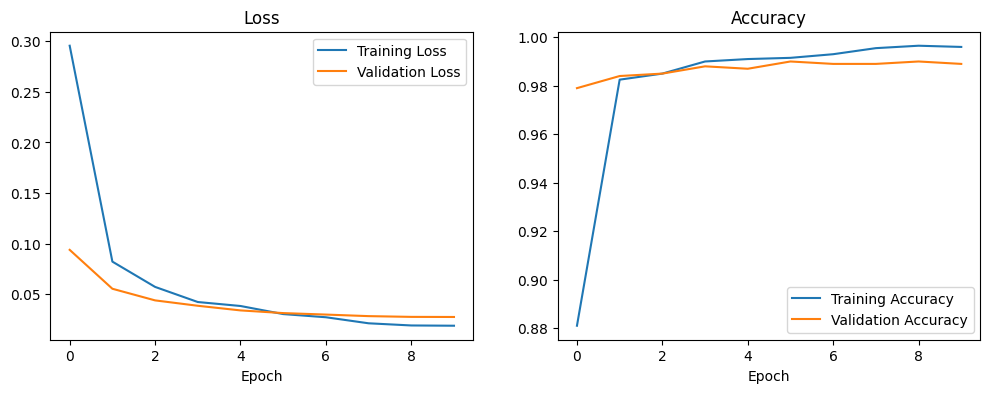

In [23]:
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_dropout.history['loss'], label='Training Loss')
plt.plot(history_dropout.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.title('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.title('Accuracy')
plt.legend()


### Pretrained models

There are many pre-trained models that you can experiment with and which can be found [here](https://keras.io/api/applications/).

For example, if you would like to work with the InceptionV3 pre-trained model, you are going to load it this way:

```
base_model = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
```



## Conclusion

If the cats & dogs dataset we used was different from the ImageNet dataset that the MobileNetV2 was trained on, then the feature representations that the MobileNetV2 learned would not have been so useful. Therefore, transfer learning techniques are recommended when the dataset is small and when it is similar to the dataset on which the pre-trained model was trained.


## Assessment

Load the cats & dogs dataset, and afterwards generate the train and validation dataset.
Load and freeze the base model.
Add a fully-connected classifier on top of the base model.
Compile, train, and evaluate the model

Please choose two from the following pre-trained (base) models:

* InceptionV3
* VGG16
* ResNet50

Compare their performance on the binary classification task of cats and dogs. Please note that you could also customise the classifier (add or remove layers) or select extra hyperparameters that you learnt in Section 1 in order to increase its performance.

You can find an overview of available pretrained models and their respective performance on the ImageNet dataset [here](https://keras.io/api/applications/#usage-examples-for-image-classification-models).

# Section 3

In this section, you will:
* learn what fine-tuning is
* build, train and evaluate a model with fine-tuning for a binary image classification task


### Fine tuning

In Section 2, we added a customized fully-connected classifier at the end of our convolutional base MobileNetV2.

In Section 3, we are going to fine-tune the weights of the top-level layers of the base model and train them along with the layers of the customised classifier. The top-level layers learn features more specific to the dataset on which the model was trained, and also to our binary classification task.

In order to fine-tune our model, we will have to first unfreeze the base model, and afterwards set certain top-level layers to be fine-tuned.


The figure below illustrates the task of fine tuning:

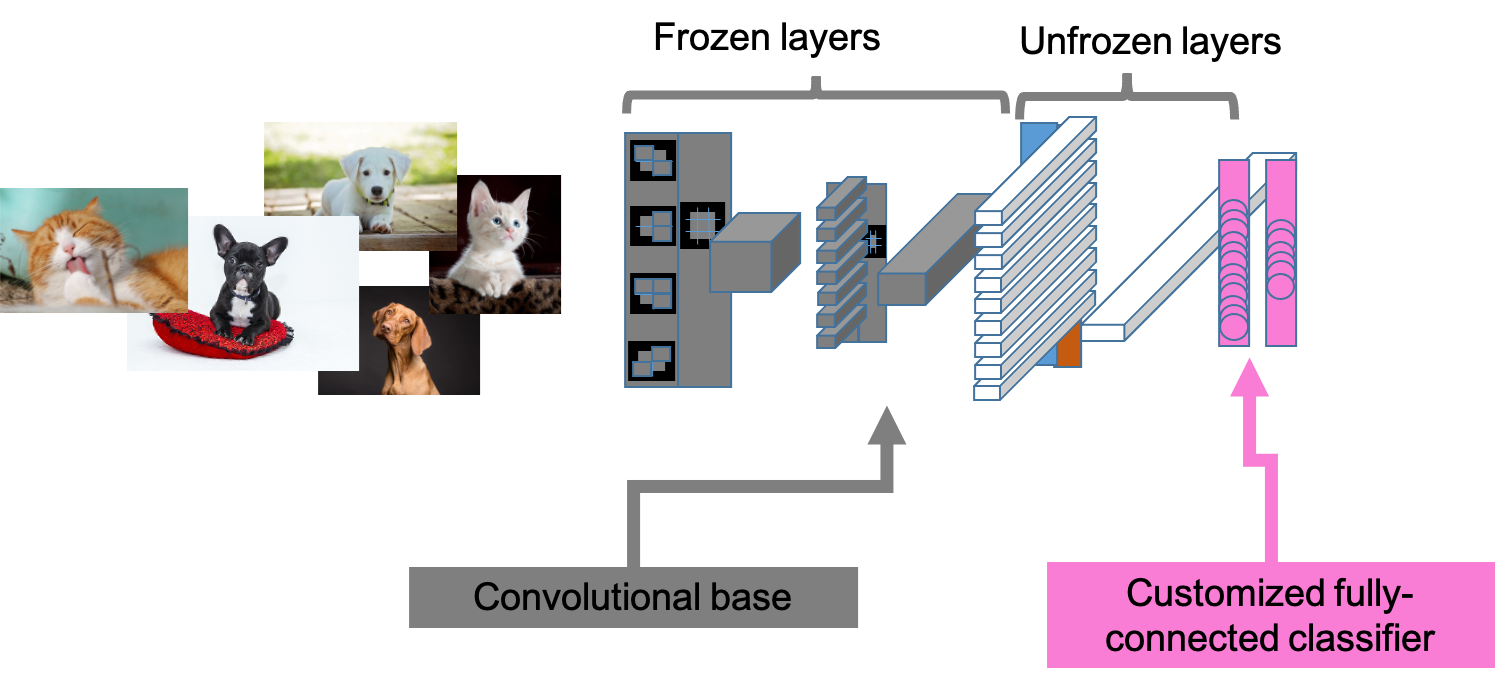

We begin by loading the same model as for section 2 again.

In [24]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')

We then unfreeze the convolutional base.

In [25]:
base_model.trainable = True

We now check the number of layers in the convolutional base.

In [26]:
len(base_model.layers)

154

With the following command, we freeze the first 120 layers of the convolutional base. The rest remain trainable. These frozen layers contain simple and generic features, which generalize well to all types of images, while the trainable, top-level layers of the base model contain the higher-level features which are specific to the dataset and to the binary classification task.


In [27]:
fine_tune_at = 120

for layer in base_model.layers[0:fine_tune_at]:
  layer.trainable = False

We then define a function to construct the the feature extraction model we wish to reuse from Section 2, and fine-tune the weights.

In [28]:
def construct_finetune_model(use_dropout=False):
    inputs = tf.keras.Input(shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
    x = Rescaling(scale = 1./127.5, offset = -1)(inputs)
    x = base_model(x, training = False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Adds a dense layers and dropout in case parameter use_dropout is set to True
    if use_dropout:
        x = Dense(128, activation='relu')(x)
        x = Dropout(rate = 0.2)(x)

    outputs = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

    if use_dropout:
        model_finetuning = tf.keras.Model(inputs, outputs, name="Fine_tuning_with_dropout")
        model_finetuning = model_feature_extraction_dropout
    else:
        model_finetuning = tf.keras.Model(inputs, outputs, name="Fine_tuning")
        model_finetuning = model_feature_extraction

    return model_finetuning

Now we make use of the function defined above, in order to select whether we are going to use the dropout layer for our experiment.

In [29]:
use_dropout = True
model_finetuning = construct_finetune_model(use_dropout)

We then compile the model, setting the learning rate and the loss function.

In [30]:
# recompile the model
learning_rate = 0.0001
model_finetuning.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

We look at the model summary and see that the model still has the same architecture as in Section 2. What has changed is that the base model is now also trainable to some extend. Since only some layers of the base model are trainable now, it still shows an `N`, indicating that not all layers of the base model are trainable. You can check for all layers of the basel model by running

`base_model.summary(show_trainable=True)`

In [31]:
model_finetuning.summary(show_trainable=True)

Model: "Feature_Extraction_2"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         Y          
                                                                            
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         Y          
                                                                            
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   N          
 tional)                                                                    
                                                                            
 global_average_pooling2d_1  (None, 1280)              0         Y          
  (GlobalAveragePooling2D)                                                  
                                                                            
 dense_1 (Dense)             (None, 128)      

We then continue the training from Section 2. This time, however, we do **fine-tuning** as opposed to feature extraction. This means that we not only train the customized fully-connected head, but also the pre-trained convolutional base of the model.

In [32]:
# resume training

fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model_finetuning.fit(train_dataset,
                                    epochs=total_epochs,
                                    validation_data=validation_dataset,
                                    initial_epoch=initial_epochs)

Epoch 11/20
63/63 [==============================] - 5s 50ms/step - loss: 0.0167 - accuracy: 0.9970 - val_loss: 0.0263 - val_accuracy: 0.9890
Epoch 12/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0130 - accuracy: 0.9975 - val_loss: 0.0257 - val_accuracy: 0.9900
Epoch 13/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0119 - accuracy: 0.9980 - val_loss: 0.0265 - val_accuracy: 0.9900
Epoch 14/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0087 - accuracy: 0.9980 - val_loss: 0.0253 - val_accuracy: 0.9880
Epoch 15/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0071 - accuracy: 0.9995 - val_loss: 0.0255 - val_accuracy: 0.9880
Epoch 16/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.0263 - val_accuracy: 0.9880
Epoch 17/20
63/63 [==============================] - 3s 40ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 0.0254 - val_accuracy: 0.9880
Epoch 

In [ ]:
# visualise the loss values
def initialize_loss_and_val(use_dropout=False):
    if use_dropout:
        return history_dropout.history['loss'], history_dropout.history['val_loss'], history_dropout.history['accuracy'], history_dropout.history['val_accuracy']
    else:
        return history.history['loss'], history.history['val_loss'], history.history['accuracy'], history.history['val_accuracy']

loss, val_loss, accuracy, val_accuracy = initialize_loss_and_val(use_dropout)
loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']
accuracy += history_fine.history['accuracy']
val_accuracy += history_fine.history['val_accuracy']

Text(0.5, 0, 'Epoch')

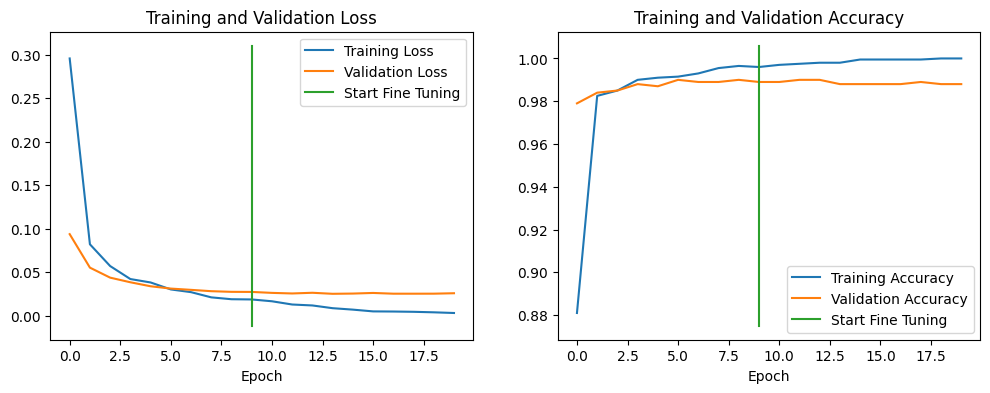

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Loss subplot
axes[0].plot(loss, label='Training Loss')
axes[0].plot(val_loss, label='Validation Loss')
axes[0].plot([initial_epochs-1,initial_epochs-1],
             axes[0].get_ylim(), label='Start Fine Tuning')
axes[0].legend(loc='upper right')
axes[0].set_title('Training and Validation Loss')
axes[0].set_xlabel('Epoch')

# Accuracy subplot
axes[1].plot(accuracy, label='Training Accuracy')
axes[1].plot(val_accuracy, label='Validation Accuracy')
axes[1].plot([initial_epochs-1,initial_epochs-1],
             axes[1].get_ylim(), label='Start Fine Tuning')
axes[1].legend(loc='lower right')
axes[1].set_title('Training and Validation Accuracy')
axes[1].set_xlabel('Epoch')

In [35]:
# make predictions

images, labels = validation_dataset.as_numpy_iterator().next()
predictions = model_finetuning.predict_on_batch(images).flatten()

In [36]:
# make predictions

predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', labels)

Predictions:
 [0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0]
Labels:
 [0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0]


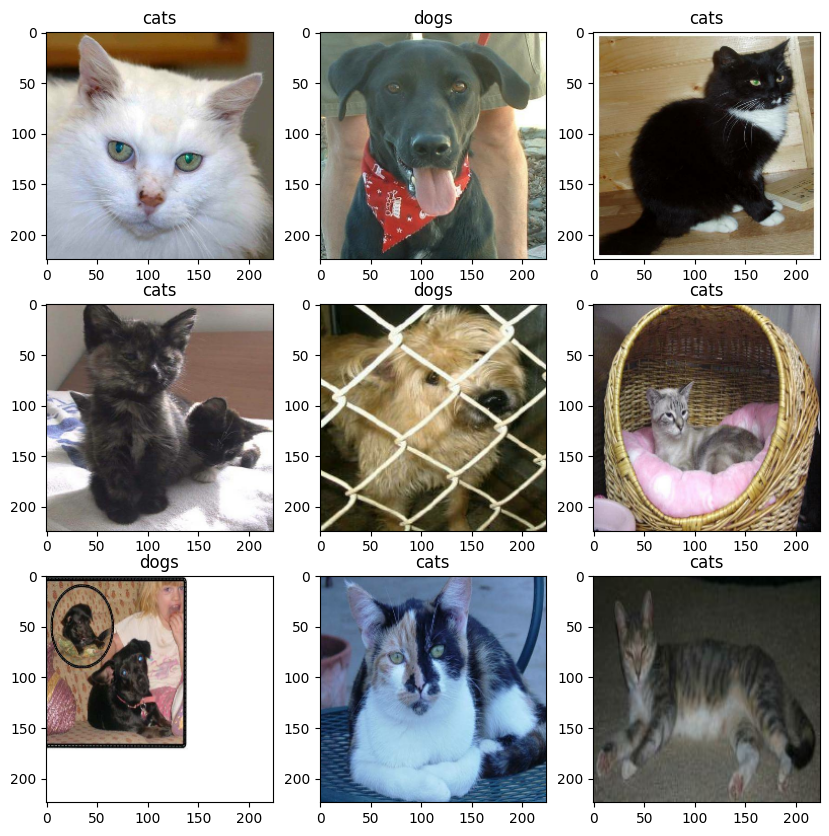

In [37]:
# plot nine predicted images

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(images[i].astype("uint8"))
  plt.title(class_names[predictions[i]])

## Conclusion

In Section 2 and Section 3, you learned about two transfer learning techniques. When we apply the **feature extraction** technique, we freeze the convolutional base and only train the weights of the layers of the classifier that we customize. When we apply the **fine-tuning** technique, we unfreeze the base model and train only the last layers of the base along with the customized classifier.


## Assessment

1. Unfreeze the base model that you froze in Section 2.
1. Fine-tune the top layers of the base model and train them along with the layers of the classifier you customized in Section 2.
1. Recompile the model.
1. Resume training.
1. Visualise the loss values and compare the performance of the model trained with the feature extraction technique with the performance of the model trained with the fine-tuning technique.
